In [96]:
import json
import time
import numpy as np

from collections import defaultdict, Counter
from typing import List, Optional, Dict, Iterable, Tuple, Callable

from IPython.display import display

# A Crash Course in Python

## Whitespace Formatting

In [2]:
# The pound sign marks the start of a comment. Python itself
# ignores the comments, but they're helpful for anyone reading the code. 
for i in [1, 2, 3, 4, 5]:
  print(i, end=": ")                      # First line in "for i" block
  for j in [1, 2, 3, 4, 5]:
    print(j, end=" ")
    print(i + j)
  
  print("; ", end="")
  print(i)
print("done looping")

1: 1 2
2 3
3 4
4 5
5 6
; 1
2: 1 3
2 4
3 5
4 6
5 7
; 2
3: 1 4
2 5
3 6
4 7
5 8
; 3
4: 1 5
2 6
3 7
4 8
5 9
; 4
5: 1 6
2 7
3 8
4 9
5 10
; 5
done looping


Whitespace is ignored inside parantheses and backets

In [3]:
long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10
  + 11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20)
long_winded_computation

210

In [4]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

easier_to_read_list_of_lists = [[1, 2, 3],
                                [4, 5, 6],
                                [7, 8, 9]]
easier_to_read_list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

Use backslash to indicate that a statement continues onto the next line


In [5]:
two_plus_three = 2 + \
                 3
two_plus_three

5

## Modules

There are commonly three ways to import libraries or other Python user-defined
function

In [6]:
import re 
my_regex = re.compile("[0-9]+", re.I)
my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

We import the library name with an alias

In [7]:
import re as regex
my_regex = regex.compile("[0-9]+", regex.I)
my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

We import specific submodule (file, class, function inside the loaded library)
using a user-defined namespace for shorten name

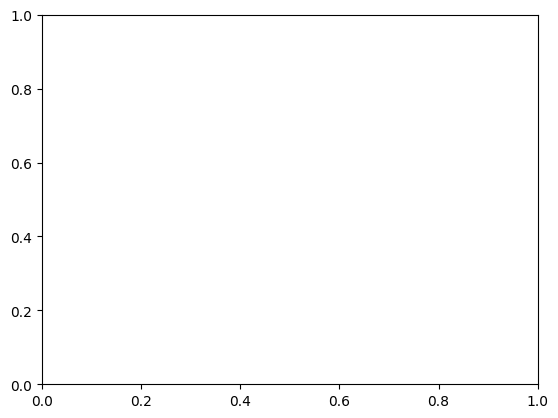

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.show(fig)

We can import explicitly the function or class inside a module/library

In [9]:
from collections import defaultdict, Counter
lookup = defaultdict(int)
my_counter = Counter()

## Functions

In [10]:
def double(x):
  """
  This is where you put an optional docstring that explains what the
  function does. For example, this function multiplies its input by 2.
  """
  return x * 2

Python functions are *first-class*, which means that we can assign them to
variables and pass them into functions just like any other arguments.

In [11]:
def apply_to_one(f):
  """Calls the function f with 1 as its argument""" 
  return f(1)

my_double = double          # referes to the previously defined function
x = apply_to_one(my_double)
x

2

Create short anonymous functions, or *lambdas*

In [12]:
y = apply_to_one(lambda x: x + 4)
y

5

Function parameters can also be given default arguments

In [13]:
def my_print(message="my default message"):
  print(message)

my_print("hello")         # prints "hello"
my_print()                # prints 'my default message'

hello
my default message


## Strings

Strings can be delimited by single or double quotation marks

In [14]:
single_quoted_string = 'data science'
double_quoted_string = "data science"

Python uses backslashes to encode special characters. For example:

In [15]:
tab_string = "\t"       # represents the tab character
len(tab_string)

1

In [16]:
not_tab_string = r"\t"      # represents the characters '\' and 't'
len(not_tab_string)

2

In [17]:
multi_line_string = """This is the first line.
  and this is the second line
  and this is the third line"""

A new feature in Python 3.6 is the *f-string*, which provides a simple
way to substitute values into strings.

In [18]:
first_name = "Joel"
last_name = "Grus"

In [19]:
full_name1 = first_name + " " + last_name             # string addition
full_name2 = "{0} {1}".format(first_name, last_name)  # string.format

print(full_name1)
print(full_name2)

Joel Grus
Joel Grus


In [20]:
full_name3 = f"{first_name} {last_name}"
print(full_name3)

Joel Grus


## Exceptions

In [21]:
try:
  print(0 / 0)
except ZeroDivisionError:
  print("cannot divide by zero")

cannot divide by zero


## Lists

This is a fundamental data structure in Python and similar to another data 
structure which is called _array_ in other programming languages.

In [22]:
integer_list = [1, 2, 3]
heterogeneous_list = ["string", 0.1, True]
list_of_lists = [integer_list, heterogeneous_list, []]

list_length = len(integer_list)   # equal 3
list_sum = sum(integer_list) # equals 6

To get the element in a list, you can use a square bracket

In [23]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

zero = x[0]    # equals 0, lists are 0-indexed
one = x[1]    # equals 1
nine = x[-1]    # equals 9, 'Pythonic' for last element
eight = x[-2]     # equals 8, 'Pythonic' for next-to-last element
x[0] = -1         # now x is [-1, 1, 2, 3, ..., 9]

We can select some elements consecutively using `:`. This technique is called
_slice_.   
The slice `i:j` means all elements from `i` (inclusive) to `j` (not inclusive).   
If you leave off the start of the slice, you'll slic from the beginning of the list,   
and if you leave of the ened of the slice, you'll slice until the end of the list.

In [24]:
first_three = x[:3]                   # [-1, 1, 2]
three_to_end = x[3:]                  # [3, 4, ..., 9]
one_to_four = x[1:5]                  # [1, 2, 3, 4]
last_three = x[-3:]                   # [7, 8, 9]
without_first_and_last = x[1:-1]      # [1, 2, ..., 8]
copy_of_x = x[:]                      # [-1, 1, 2, ..., 9]

There is a third argument in slice technique that controls how many element that you skipped.   
It also supports the negative number

In [25]:
every_third = x[::3]        # [-1, 3, 6, 9]
five_to_three = x[5:2:-1]   # [5, 4, 3]

You can test if an element (it should be an integer type) is an element of 
a list.

In [26]:
# For a very long list (one million elements, you should not to use this)
print(1 in [1, 2, 3])      # True
print(0 in [1, 2, 3])      # False

True
False


In-place extension of a list with a list

In [27]:
x = [1, 2, 3]
x.extend([4, 5, 6])       # x is now [1, 2, 3, 4, 5, 6]

Or you can make a new list from a previous list by extending it

In [28]:
x = [1, 2, 3]
y = x + [4, 5, 6]         # y is [1, 2, 3, 4, 5, 6]: x is unchanged

Frequently, we usually append a single element at a time

In [29]:
x = [1, 2, 3]
x.append(0)       # x is now [1, 2, 3, 0]
y = x[-1]         # equals 0
z = len(x)        # equals 4

We can unpack each element in a list to a specific variable, if we know
how many elements in a list

In [30]:
x, y = [1, 2]
p, q, r = [1, 2, 3]     # now x is 1, y is 2

There is a best practice to use `_` if you want to throw away an element
you really do not care about

In [31]:
_, y = [1, 2]     # now y == 2, didn't care about the first element

## Tuples

Tuples are very similar to list, but it is immutable (after you construct
the elements, you cannot change it)

In [32]:
my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4
my_list[1] = 3          # my_list is now [1, 3]

try:
  my_tuple[1] = 3
except TypeError:
  print("cannot modify a tuple")

cannot modify a tuple


To return many values in a function, you can use tuple.   
By default if you separate each value by comma in return line of a function,   
you create automatically a tuple

In [33]:
def sum_and_product(x, y):
  return (x + y), (x * y)

sp = sum_and_product(2, 3)      # sp is (5, 6)
s, p = sum_and_product(5, 10)   # s is 15, p is 50

Multiple assignment and element swapping can be performed by using a tuple

In [34]:
x, y = 1, 2      # now x is 1, y is 2
x, y = y, x      # Pythonic way to swap variables; now x is 2, y is 1

## Dictionaries

In [35]:
empty_dict = {}                       # Pythonic
empty_dict2 = dict()                  # less Pythonic
grades = {"Joel": 80, "Tim": 95}      # dictionary literal


To get an element (which is called _value_) you can use _key_ of the dictionary

In [36]:
joels_grade = grades["Joel"]      # equals 80

Check for the existence of a key using `in`.    
The membership check is **fast** even for large dictionaries.

In [37]:
joel_has_grade = "Joel" in grades    # True
kate_has_grade = "Kate" in grades    # False

print(joel_has_grade, kate_has_grade)

True False


Another way to get a value in a dictionary without raising an exception

In [38]:
joels_grade = grades.get("Joel", 0)   # equals 80
kates_grade = grades.get("Kate", 0)   # equals 0
no_ones_grade = grades.get("No One")  # default is None

Similar to list, we can assign a new value to a specific key

In [39]:
grades["Tim"] = 99          # replaces the old value
grades["Kate"] = 100        # adds a third entry
num_students = len(grades)  # equals 3

We can use dictionary to create a complicated data structure.

In [40]:
tweet = {
  "user": "joelgrus",
  "text": "Data Science is Awesome",
  "retweet_count": 100,
  "hashtags": ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

There is a method (a built-in function attached to a dictionary) to get all
the keys, values, or items

In [41]:
tweet_keys = tweet.keys()       # iterable for the keys
tweet_values = tweet.values()   # iterable for the values
tweet_items = tweet.items()     # iterable for the (key, value) tuples

print("user" in tweet_keys)        # True, but not Pythonic
print("user" in tweet)             # Pythonic way of checking for keys
print("joelgrus" in tweet_values)  # True (slow but the only way to check)

True
True
True


##  defaultdict

In [42]:
document = "\
This is a somewhat heavy aspiration for a book. The best way to learn hacking skills is \
by hacking on things. By reading this book, you will get a good understanding of the \
way I hack on things, which may not necessarily be the best way for you to hack on \
things. You will get a good understanding of some of the tools I use, which will not \
necessarily be the best tools for you to use. You will get a good understanding of the \
way I approach data problems, which may not necessarily be the best way for you to \
approach data problems. The intent (and the hope) is that my examples will inspire \
xvyou to try things your own way. All the code and data from the book is available on \
GitHub to get you started."
document = [word.lower().strip(".()") for word in document.split(" ")]
document

['this',
 'is',
 'a',
 'somewhat',
 'heavy',
 'aspiration',
 'for',
 'a',
 'book',
 'the',
 'best',
 'way',
 'to',
 'learn',
 'hacking',
 'skills',
 'is',
 'by',
 'hacking',
 'on',
 'things',
 'by',
 'reading',
 'this',
 'book,',
 'you',
 'will',
 'get',
 'a',
 'good',
 'understanding',
 'of',
 'the',
 'way',
 'i',
 'hack',
 'on',
 'things,',
 'which',
 'may',
 'not',
 'necessarily',
 'be',
 'the',
 'best',
 'way',
 'for',
 'you',
 'to',
 'hack',
 'on',
 'things',
 'you',
 'will',
 'get',
 'a',
 'good',
 'understanding',
 'of',
 'some',
 'of',
 'the',
 'tools',
 'i',
 'use,',
 'which',
 'will',
 'not',
 'necessarily',
 'be',
 'the',
 'best',
 'tools',
 'for',
 'you',
 'to',
 'use',
 'you',
 'will',
 'get',
 'a',
 'good',
 'understanding',
 'of',
 'the',
 'way',
 'i',
 'approach',
 'data',
 'problems,',
 'which',
 'may',
 'not',
 'necessarily',
 'be',
 'the',
 'best',
 'way',
 'for',
 'you',
 'to',
 'approach',
 'data',
 'problems',
 'the',
 'intent',
 'and',
 'the',
 'hope',
 'is',
 't

We use `defautdict` if we want to avoid hassle in defining a try-except block
when there is no key to query in dictionary.   
`defaultdict` provides with a default value when initializing a dictionary

In [43]:
word_counts = defaultdict(int)
for word in document:
  word_counts[word] += 1

sorted(word_counts.items(), key=lambda key_val: key_val[1], reverse=True)

[('the', 11),
 ('you', 7),
 ('way', 6),
 ('to', 6),
 ('a', 5),
 ('will', 5),
 ('is', 4),
 ('for', 4),
 ('best', 4),
 ('on', 4),
 ('get', 4),
 ('of', 4),
 ('things', 3),
 ('good', 3),
 ('understanding', 3),
 ('i', 3),
 ('which', 3),
 ('not', 3),
 ('necessarily', 3),
 ('be', 3),
 ('data', 3),
 ('this', 2),
 ('book', 2),
 ('hacking', 2),
 ('by', 2),
 ('hack', 2),
 ('may', 2),
 ('tools', 2),
 ('approach', 2),
 ('and', 2),
 ('somewhat', 1),
 ('heavy', 1),
 ('aspiration', 1),
 ('learn', 1),
 ('skills', 1),
 ('reading', 1),
 ('book,', 1),
 ('things,', 1),
 ('some', 1),
 ('use,', 1),
 ('use', 1),
 ('problems,', 1),
 ('problems', 1),
 ('intent', 1),
 ('hope', 1),
 ('that', 1),
 ('my', 1),
 ('examples', 1),
 ('inspire', 1),
 ('xvyou', 1),
 ('try', 1),
 ('your', 1),
 ('own', 1),
 ('all', 1),
 ('code', 1),
 ('from', 1),
 ('available', 1),
 ('github', 1),
 ('started', 1)]

`defaultdict` can also be useful with `list` or `dict`, or even
your own functions:

In [44]:
dd_list = defaultdict(list)       # list() produces an empty list
dd_list[2].append(1)
dd_list

defaultdict(list, {2: [1]})

In [45]:
dd_dict = defaultdict((dict))         # dict() produces an empty dict
dd_dict["Joel"]["City"] = "Seattle"
dd_dict

defaultdict(dict, {'Joel': {'City': 'Seattle'}})

In [46]:
dd_pair = defaultdict(lambda: [0, 0])       # default value would be [0, 0]
dd_pair[2][1] = 1
dd_pair

defaultdict(<function __main__.<lambda>()>, {2: [0, 1]})

## Counter

 A `Counter` turns a sequence of values into a `defaultdict(int)`-like
 object mapping keys to counts:

In [47]:
c = Counter([0, 1, 2, 0])     # c is (basically) {0: 2, 1: 1, 2:1}

In [48]:
# recall, document is a list of words
word_counts = Counter(document)

# print the 10 most common words and their counts
for word, count in word_counts.most_common(10):
  print(word, count)

the 11
you 7
way 6
to 6
a 5
will 5
is 4
for 4
best 4
on 4


## Sets


If we have a large collection of items that we want to use for a membership
test, a set is more appropriate than a list.   
This data type will elimate any duplicate element in intialization of the data type


In [49]:
primes_below_10 = {2, 3, 5, 7}

In [50]:
s = set()
s.add(1)      # s is now {1}
s.add(2)      # s is now {1, 2}
s.add(2)      # s is still {1, 2}
x = len(s)    # equals 2
y = 2 in s    # equals True
z = 3 in s    # equals False

Using `in` in set is much faster than using `in` a list.

In [51]:
# The following stopwords is download from https://github.com/stopwords-iso/stopwords-iso
with open("./datasets/stopwords-en.json", 'r') as fp:
  hundreds_of_other_words = json.load(fp)["en"]

[hundreds_of_other_words.remove(item) for item in ["a", "an", "at", "yet", "you"]];

In [52]:
stopwords_list = ["a", "an", "at"] + hundreds_of_other_words + ["yet", "you"]
t0 = time.perf_counter_ns()
print("zip" in stopwords_list)    # False, but have to check every element
tEnd = time.perf_counter_ns()
print(f"elapsed time: {tEnd - t0:8d} ns")

stopwords_set = set(stopwords_list)
t0 = time.perf_counter_ns()
print("zip" in stopwords_set)     # very fast to check
tEnd = time.perf_counter_ns()
print(f"elapsed_time: {tEnd - t0:8d} ns")

False
elapsed time:   448600 ns
False
elapsed_time:    77500 ns


Set is very handy when we want to get the distinct element for a given a list

In [53]:
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list)      # 6
item_set = set(item_list)       # {1, 2, 3}
num_distinct_items = len(item_set)      # 3
distinct_item_list = list(item_set)     # [1, 2, 3]

## Control Flow

Branching flow with `if-elif-else`

In [54]:
a = 1
# a = 3
# a = 4

if a > 2:
  message = "if only 1 were greater than two..."
elif a > 3:
  message = "elif stands for 'else if'"
else:
  message = "when all else fails use else (if you want to)"

Shorter version of `if-else` with ternary operator

In [55]:
x = 1 
parity = "even" if x % 2 == 0 else "odd"
parity

'odd'

Looping with condition

In [56]:
x = 0
while x < 10:
  print(f"{x} is less than 10")
  x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


Looping with iterable `range(10)`

In [57]:
# raneg(10) is the numbers 0, 1, ..., 9
for x in range(10):
  print(f"{x} is less than 10")

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


To control the flow of iteration, you can insert command `continue` or `break`

In [58]:
for x in range(10):
  if x == 3:
    continue      # go immediately to the next iteration
  if x == 5:
    break         # quit the loop entirely
  print(x)

0
1
2
4


## Truthiness

Boolean data type in Python has literals: `True` and `False`

In [59]:
one_is_less_than_two = 1 < 2
true_equals_false = True == False

Python uses the value `None` to indicate a nonexistent value.   
It is simlar to other languages' `null`

In [60]:
x = None
assert x == None, "this is not the Python way to check for None"
assert x is None, "this is the Pythonic way to check for None"

The following are "falsy" in Python:
`False`, `None`, `[]` (an empty `list`), `{}` (an empty `dict`),
`""`, `set()`, `0`, `0.0`

Python has an `all` function, which takes an iterable and return `True`  
precisely when every element is truthy,   
and an `any` function, which returns `True` when at least one element is truthy

In [61]:
print(all([True, 1, {3}]))      # True, all are truthy
print(all([True, 1, {}]))       # False, {} is falsy
print(any([True, 1, {}]))       # True, True is truthy
print(all([]))                  # True, no falsy elements
print(any([]))                  # False, no truthy elements in the list

True
False
True
True
False


## Sorting

If you have unordered list and want to sort them, you can use `sorted()` or `.sort()`

In [62]:
x = [4, 1, 2, 3]
y = sorted(x)       # y is [1, 2, 3, 4], x is unchanged
x.sort()            # now x is [1, 2, 3, 4]

Sorting with reverse order (from largest to smallest) and/or with key function
(this controls how you sort the list)

In [72]:
word_counts;

In [64]:
# sort the list by absolute value from largest to smallest
x = sorted([-4, 1, -2, 3], key=abs, reverse=True)     # [-4, 3, -2, 1]

# sort the words and counts from the highest count to lowest
wc = sorted(word_counts.items(), key=lambda word_and_count: word_and_count[1],
            reverse=True)

## List Comprehension

A shorter way to transform a list to a new list by iterating each element
using a single line command of for loop

In [73]:
even_numbers = [x for x in range(5) if x % 2 == 0]    # [0, 2, 4]
squares = [x * x for x in range(5)]                   # [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers]          # [0, 4, 16]

Turn a list into dictionary or set

In [74]:
square_dict = {x: x * x for x in range(5)}    # {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}
square_set = {x * x for x in [1, -1]}         # {1}

You can do a nested list comprehension (loop inside loop)

In [75]:
pairs = [(x, y) 
         for x in range(10)
         for y in range(10)]      # has the same length as even_numbers

The later `for` in two nested list comprehension can use the result of 
the earlier `for`

In [76]:
increasing_pairs = [(x, y)
                    for x in range(10)
                    for y in range(x + 1, 10)]

## Automated Testing and assert

Using `assert` can help you to reduce that your program won't run as you expected

In [77]:
assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't"

In [78]:
def smallest_item(xs):
  return min(xs)

assert smallest_item([10, 20, 5, 40]) == 5
assert smallest_item([1, 0, -1, 2]) == -1

## Object-Oriented Programming

This is a core principel of object-oriented programming in Python.   
For full description, you have to take a course in Object-oriented programming.   
The following example is a minimal description and it should be enough to   
represent the mechanism of object oriented programming

In this example, we want to create a clicker (or counter) by using class.  
This class contains 
- an intialization function/method (`__init__()`)
- a representation of its instance using function/method (`__repr__()`)
- a function that simulate click of a counter (adding one to the current value) `click()`
- a function to read the current value (`read()`)
- a function to reset the counter

In [80]:
class CountingClicker(object):
  """A class can/should have a docstring, just like a function"""
  def __init__(self, count=0):
    self.count = count

  def __repr__(self):
    return f"CountingClicker(count={self.count})"
  
  def click(self, num_times=1):
    """Click the clicker some number of times."""
    self.count += num_times
  
  def read(self):
    return self.count

  def reset(self):
    self.count = 0

In [ ]:
clicker1 = CountingClicker()          # a clicker that is initialized to 0
clicker2 = CountingClicker(100)       # a second clicker, starts with count=100
clicker3 = CountingClicker(count=100) # a third clicker more explicity way of doing ame

All the above clickers (`clicker1`, `clicker2`, and `clicker3`) hold each 
own properties and do not interfere each other

An example of a test case using `CountingClicker()` class

In [81]:
clicker = CountingClicker()
assert clicker.read() == 0, "clicker should start with count 0"
clicker.click()
clicker.click()
assert clicker.read() == 2, "after two clicks, clicker should have count 2"
clicker.reset()
assert clicker.read() == 0, "after reset, clicker should be back to 0"

If you want to modify a class but only a few of methods that you want to modify,  
you do not need to rewrite all the class methods.  
We can use an inheritance, by putting the parent class to the modified class
(child class)

In [82]:
# A subclass inherits all the behavior of its parent class
class NoResetClicker(CountingClicker):
  # This class has all the same methods as CountingClicker

  # Except that it has a reset method that does nothing
  def reset(self):
    pass

In [84]:
# Simualte the above child class (subclass)
clicker2 = NoResetClicker()
assert clicker2.read() == 0
clicker2.click()
assert clicker2.read() == 1
clicker2.reset()
assert clicker2.read() == 1, "reset shouldn't do anything"

## Iterables and Generators

When you are dealing with a huge element in a list (one billion elements),   
it is not wise to load all the element into a variable and then read one-by-one.   
The clever way to avoid this huge amount of memory consumption is to generate
a single element one at time.

In [85]:
def generate_range(n):
  i = 0
  while i < n:
    yield i     # every call to yield produce a value of the generator
    i += 1

In [88]:
for i in generate_range(10):
  print(f"i: {i}")

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9


By the same concept as above, we can generate an infinite sequence.  
This meaning of infinity of course limited by the time when you stop to generate
the next value

In [89]:
def natural_numbers():
  """returns 1, 2, 3, ..."""
  n = 1
  while True:
    yield n
    n += 1

We can use generator inside a list of comprehension

In [90]:
evens_below_20 = (i for i in generate_range(20) if i % 2 == 0)

The following code is a data-proprecssing pipelines that use generator

In [93]:
# None of these computation 'does' anything until we iterate
data = natural_numbers()
evens = (x for x in data if x % 2 == 0)
even_squares = (x**2 for x in evens)
even_squares_ending_in_six = (x for x in even_squares if x % 10 == 6)
# and so on

# Test
assert next(even_squares_ending_in_six) == 16
assert next(even_squares_ending_in_six) == 36
assert next(even_squares_ending_in_six) == 196

## Randomness

In [101]:
seed = 10
rng = np.random.default_rng(seed)

# rng.random() produces numbers uniformly between 0 and 1. It's the random 
# function we'll use most often
four_uniform_randoms = rng.random(4)
four_uniform_randoms

array([0.95600171, 0.20768181, 0.82844489, 0.14928212])

Using the same `seed` we can generate the same random number

In [110]:
rng = np.random.default_rng(seed)
rng.random(4)

array([0.95600171, 0.20768181, 0.82844489, 0.14928212])

Choose randomly an integer for a given range

In [117]:
print(rng.integers(10))         # chose randomly from range(10) = [0, 1, ..., 9]
print(rng.integers(3, 6))       # chose randomly from range(3, 6) = [3, 4, 5]

1
4


Shuffle a given list

In [122]:
up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rng.shuffle(up_to_ten)
print(up_to_ten)

[4, 5, 2, 7, 8, 6, 10, 9, 3, 1]


Pick one element in a list (any data type)

In [129]:
my_best_friend = rng.choice(["Alice", "Bob", "Charlie"])
my_best_friend

'Charlie'

Choose randomly a sample of elements without replacement (i.e., with no duplicates)

In [133]:
lottery_numbers = range(60)
winning_numbers = rng.choice(lottery_numbers, replace=False, size=6)
winning_numbers

array([ 2, 29, 58, 18, 28, 10])

## Regular Expressions

A regular expression is an expression that simplify how we define a pattern
in given any text.    
There are entire books written about them, so we only cover the basic of it.

In [134]:
re_examples = [                           # All of these are True, because
  not re.match("a", "cat"),               # 'cat' does not start with 'a'
  re.search("a", "cat"),                  # 'cat has an 'a' in it
  not re.search("c", "dog"),              # 'dog' doesn't have a 'c' in it.
  3 == len(re.split("[ab]", "carbs")),    # Split on a or b to ['c', 'r', 's']
  "R-D-" == re.sub("[0-9]", "-", "R2D2")  # Replace digits with dashes in "R2D2"
]

assert all(re_examples), "all the regex example should be True"

## `zip` and Argument Unpacking

Like a zipper, you can iterate in parallel two or more list with the same length
using `zip`

In [136]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

# zip is lazy (only generate the element if we call it), so you have todo 
# something like the following
[pair for pair in zip(list1, list2)]    # is [('a', 1), ('b', 2), ('c', 3)]

[('a', 1), ('b', 2), ('c', 3)]

There is another strange trick to unzip using `*` (asterisk) 
that performs argument unpacking

In [137]:
pairs = [('a', 1), ('b', 2), ('c', 3)]
letters, numbers = zip(*pairs)
letters, numbers

(('a', 'b', 'c'), (1, 2, 3))

## `args` and `kwargs`

Let us define a function that takes an input of some function `f` and returns   
a new function that for any input returns twice of the value of `f`.

In [140]:
def doubler(f):
  # Here we define a new function that keeps a reference to f
  def g(x):      # <-- g only takes one argument
    return 2 * f(x)

  # And return that new function
  return g

We test for a function `f` with a single argument

In [142]:
def f1(x):
  return x + 1

g_test = doubler(f1)
assert g_test(3) == 8, "(3 + 1) * 2 should equal 8"
assert g_test(-1) == 0, "(-1 + 1) * 2 should equal 0"

When we test with a function `f` with two arguments, we have an error

In [145]:
def f2(x, y):
  return x + y

g_test = doubler(f2)
try:
  g_test(1, 2)
except TypeError:
  print("as defined, g only takes one argument")

as defined, g only takes one argument


To make our function `doubler` works for any function `f`, we have to special   
arguments: `*args` (unnamed arguments), and `**kwargs` (keyword arguments or named arguments)

In [146]:
def doubler_correct(f):
  """works no matter what kind of inputs f expect"""
  def g(*args, **kwargs):
    """whatever arguments g is supplied, pass them through to f"""
    return 2 * f(*args, **kwargs)

  return g

g_test = doubler_correct(f2)
assert g_test(1, 2) == 6, "doubler should work now"

## Type Annotations

Because Python is a *dynamically typed* language, these type annotations
don't actually *do* anything.   
This only help us to understand
the function theoretically and mathematically 
when we put them into documentation 

In [54]:
def add(a: int, b: int) -> int:
  return a + b

print(add(10, 5))            # you'd like this to be OK
print(add("hi ", "there"))   # you'd like this to be not OK

15
hi there


Type annotation for list. You have to specify the type of its element.   
In the below example the output has type annotation `float` which indicates
by the arrow `->`

In [147]:
def total(xs: List[float]) -> float:
  return sum(xs)

print(total([2, 3, 4]))

9


When the type is not obvious (whether it is `None` or `float`)

In [148]:
best_so_far: Optional[float] = None   # allowed to be either a float or None

Other type such as iterable, dictionary and tuple

In [149]:
# keys are string, values are ints
counts: Dict[str, int] = {"data": 1, "science": 2}

# lists and generators are both iterable
lazy: bool = True
if lazy:
  evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
  evens = [0, 2, 4, 6, 8]   # if you put a value to a variable, you do not need to specify the type

# tuples specify a type for each element
triple: Tuple[int, float, int] = (10, 2.3, 5)

Because Python is a programming language that supports first-class function,   
we can put a function as an argument to another function and set its type
to `Callable`

In [150]:
# The type hint says that repeater is a function that takes
# two arguments, a string and an int, and returns a string
def twice(repeater: Callable[[str, int], str], s: str) -> str:
  return repeater(s, 2)

def comma_repeater(s: int, n: int) -> str:
  n_copies = [s for _ in range(n)]
  return ", ".join(n_copies)

assert twice(comma_repeater, "type hints") == "type hints, type hints"

You can put type object to a variable and use that variable instead a full type

In [ ]:
Number = int
Numbers = List[Number]

def total(xs: Numbers) -> Number:
  return sum(xs)